# ML WorkFlow / Blueprint
  ### Load data
### EDA (Exploratory data analysis)
* Graphing
* Do we have outliers?
* Do we have nulls / invalids ?
* Do we have duplicates?
* Correlation matrix
### Cleanup
* Fix null values (drop / replace)
* De-dupe
* Any other cleanup
### Shape data for ML
* Encode categorical data into numbers
* Scale data if necessary
* Feature selection
* Figure out X,y
* train/test split
* Actually, do cross-validation
### Train the algorithm
### Evaluated the model
* Scoring / metrics
* Regression : r2, rmse (and more)
* classification : accuracy, confusion matrix (and more)
### Improved our model  (while keeping notes!)
* Iterations
* Added more features
* Scaling 
### Deploy 


In [1]:
# Import libraries 
import pandas as pd 
import os
import urllib.request
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# Load Data

In [2]:
data_location = "bank-full.csv"
data_url = 'https://github.com/diwakarsachan/marketing-project-final/raw/main/bank-full.csv'

if not os.path.exists (data_location):
    data_location = os.path.basename(data_location)
    if not os.path.exists(data_location):
        print("Downloading : ", data_url)
        urllib.request.urlretrieve(data_url, data_location)
print('data_location:', data_location)

data_location: bank-full.csv


In [3]:
import pandas as pd
pd.options.display.float_format = '{:,.2f}'.format

marketing_outcome = pd.read_csv(data_location, sep=';')
marketing_outcome.sample(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
28120,30,technician,single,secondary,no,486,no,no,cellular,28,jan,335,3,-1,0,unknown,no
16115,31,blue-collar,married,primary,no,-81,yes,no,cellular,22,jul,261,1,-1,0,unknown,no
14843,25,services,single,secondary,no,93,no,no,cellular,16,jul,130,1,-1,0,unknown,no
14581,43,admin.,married,secondary,no,59,yes,no,cellular,15,jul,60,3,-1,0,unknown,no
2311,30,self-employed,married,tertiary,no,227,yes,yes,unknown,12,may,227,3,-1,0,unknown,no
43510,31,admin.,divorced,secondary,no,2980,no,no,cellular,20,apr,930,4,292,2,other,no
24742,34,blue-collar,married,primary,no,7673,yes,no,cellular,18,nov,143,1,-1,0,unknown,no
9262,35,entrepreneur,married,secondary,no,2074,yes,no,unknown,5,jun,144,7,-1,0,unknown,no
25007,57,blue-collar,married,secondary,no,649,yes,no,cellular,18,nov,122,1,-1,0,unknown,no
15958,29,technician,single,secondary,no,-496,yes,yes,cellular,22,jul,422,8,-1,0,unknown,no


# Clean up 

In [4]:
marketing_outcome =marketing_outcome.replace({'default': {'yes': True, 'no': False}, 'housing': {'yes': True, 'no': False}, 'loan': {'yes': True, 'no': False}, 'y': {'yes': True, 'no': False}})

In [5]:
marketing_outcome.sample(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
3132,44,blue-collar,married,primary,False,112,True,False,unknown,14,may,225,2,-1,0,unknown,False
39189,33,blue-collar,divorced,secondary,False,865,True,False,cellular,18,may,158,2,-1,0,unknown,False
12710,52,management,married,secondary,False,3369,False,False,cellular,7,jul,196,2,-1,0,unknown,False
19195,51,admin.,married,secondary,False,-267,False,True,cellular,6,aug,91,4,-1,0,unknown,False
582,55,services,divorced,primary,False,2298,True,False,unknown,6,may,162,2,-1,0,unknown,False
39477,49,technician,divorced,secondary,False,972,False,False,cellular,25,may,613,2,-1,0,unknown,False
20046,47,blue-collar,married,primary,False,254,False,True,cellular,8,aug,492,3,-1,0,unknown,False
24726,48,technician,married,secondary,False,42,True,True,cellular,17,nov,92,1,-1,0,unknown,False
12052,47,blue-collar,married,primary,False,643,True,False,unknown,20,jun,18,6,-1,0,unknown,False
25943,56,self-employed,married,tertiary,True,0,False,False,cellular,19,nov,122,1,-1,0,unknown,False


# Explore Data (EDA)
* Mean/Median 
* Various charts
* Outliers in data


In [6]:
marketing_outcome.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  bool  
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  bool  
 7   loan       45211 non-null  bool  
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  bool  
dtypes: bool(4), int64(7), object(6)
memory usage: 4.7+ MB


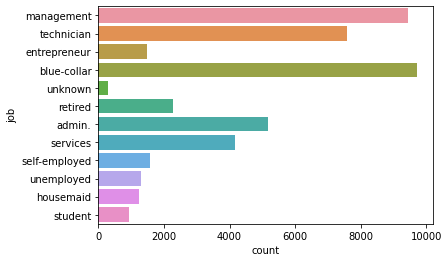

In [7]:
sns.countplot(data=marketing_outcome, y='job')


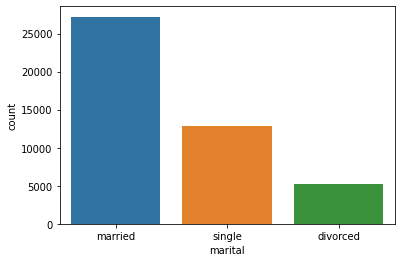

In [8]:
sns.countplot(data=marketing_outcome, x='marital')

In [9]:
## Check data skew
marketing_outcome['y'].value_counts()

False    39922
True      5289
Name: y, dtype: int64

In [25]:
categoric = marketing_outcome.select_dtypes(include='O')
for i in categoric.columns:
  print(categoric[i].value_counts())
  print()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

married     27214
single      12790
divorced     5207
Name: marital, dtype: int64

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64

cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64

may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: month, dtype: int64

unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype: int64



In [10]:
# Correlation Matrix
marketing_outcome.corr()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,y
age,1.00,-0.02,0.10,-0.19,-0.02,-0.01,-0.00,0.00,-0.02,0.00,0.03
default,-0.02,1.00,-0.07,-0.01,0.08,0.01,-0.01,0.02,-0.03,-0.02,-0.02
balance,0.10,-0.07,1.00,-0.07,-0.08,0.00,0.02,-0.01,0.00,0.02,0.05
housing,-0.19,-0.01,-0.07,1.00,0.04,-0.03,0.01,-0.02,0.12,0.04,-0.14
loan,-0.02,0.08,-0.08,0.04,1.00,0.01,-0.01,0.01,-0.02,-0.01,-0.07
day,-0.01,0.01,0.00,-0.03,0.01,1.00,-0.03,0.16,-0.09,-0.05,-0.03
duration,-0.00,-0.01,0.02,0.01,-0.01,-0.03,1.00,-0.08,-0.00,0.00,0.39
campaign,0.00,0.02,-0.01,-0.02,0.01,0.16,-0.08,1.00,-0.09,-0.03,-0.07
pdays,-0.02,-0.03,0.00,0.12,-0.02,-0.09,-0.00,-0.09,1.00,0.45,0.10
previous,0.00,-0.02,0.02,0.04,-0.01,-0.05,0.00,-0.03,0.45,1.00,0.09


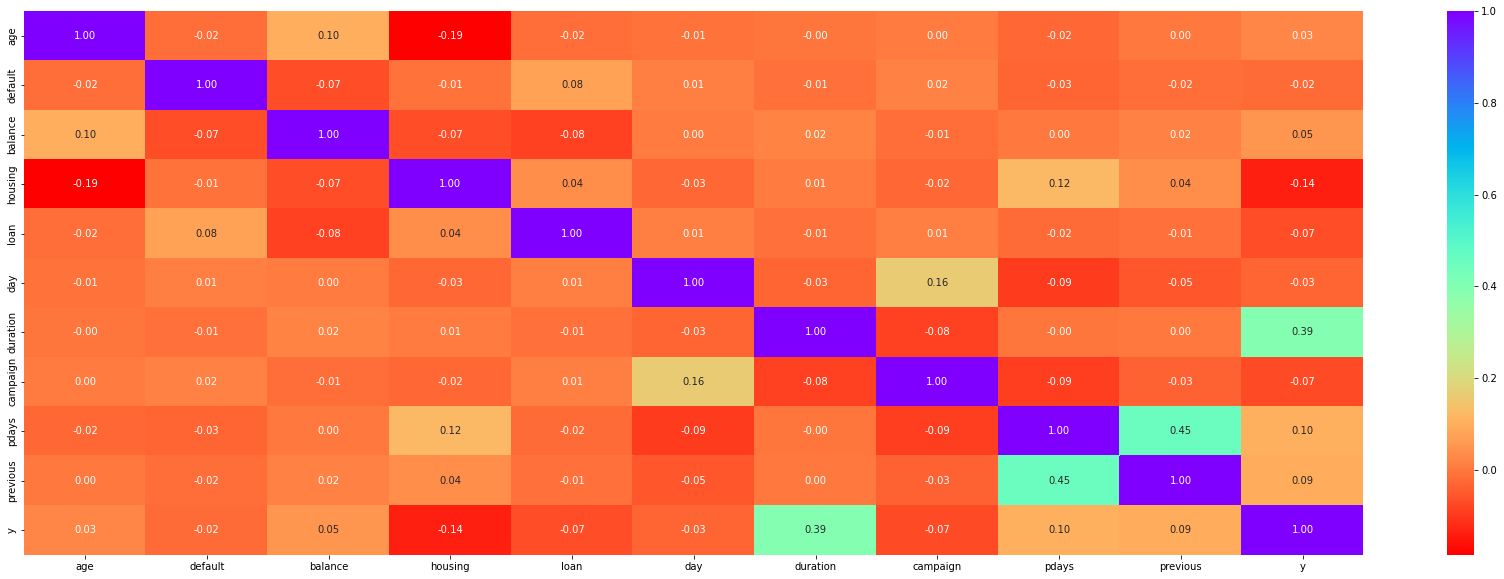

In [11]:
plt.figure(figsize = (30,10))

#sns.set_context("talk", font_scale=0.9) 
sns.heatmap(marketing_outcome.corr(), cmap='rainbow_r', annot=True, fmt='.2f')

# Shape Data
* Lot of work and analysis is needed
* Interpretation is also important 

In [23]:
# Use OneHotEncoder for - 'job', 'marital', 'education', 'contact', 'month', 'poutcome'

In [30]:
from sklearn.preprocessing import OneHotEncoder
categoric = marketing_outcome.select_dtypes(include='O')
categoric.head()

,job,marital,education,contact,month,poutcome
0,management,married,tertiary,unknown,may,unknown
1,technician,single,secondary,unknown,may,unknown
2,entrepreneur,married,secondary,unknown,may,unknown
3,blue-collar,married,unknown,unknown,may,unknown
4,unknown,single,unknown,unknown,may,unknown


In [31]:
marketing_outcome = pd.get_dummies(marketing_outcome, columns=[col for col in marketing_outcome.columns if col in categoric])


,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,False,2143,True,False,5,261,1,-1,0,...,0,0,1,0,0,0,0,0,0,1
1,44,False,29,True,False,5,151,1,-1,0,...,0,0,1,0,0,0,0,0,0,1
2,33,False,2,True,True,5,76,1,-1,0,...,0,0,1,0,0,0,0,0,0,1
3,47,False,1506,True,False,5,92,1,-1,0,...,0,0,1,0,0,0,0,0,0,1
4,33,False,1,False,False,5,198,1,-1,0,...,0,0,1,0,0,0,0,0,0,1


In [32]:
marketing_outcome.columns

Index(['age', 'default', 'balance', 'housing', 'loan', 'day', 'duration',
       'campaign', 'pdays', 'previous', 'y', 'job_admin.', 'job_blue-collar',
       'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student', 'job_technician',
       'job_unemployed', 'job_unknown', 'marital_divorced', 'marital_married',
       'marital_single', 'education_primary', 'education_secondary',
       'education_tertiary', 'education_unknown', 'contact_cellular',
       'contact_telephone', 'contact_unknown', 'month_apr', 'month_aug',
       'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'poutcome_failure', 'poutcome_other', 'poutcome_success',
       'poutcome_unknown'],
      dtype='object')

In [ ]:
# Scale data if necessary - Scaling technique depends on input data. Starting with MinMaxScaler() as the first scaler choice to transform a feature . Tested StandarScaler too but results were not great
# https://stackoverflow.com/questions/51237635/difference-between-standard-scaler-and-minmaxscaler
# Also, instead of train test split, should not we use cross validations?


In [33]:
label_col = 'y'

feature_columns = marketing_outcome.columns
feature_columns = feature_columns.drop (['y']) # What else needs to be dropped??
print (feature_columns)

Index(['age', 'default', 'balance', 'housing', 'loan', 'day', 'duration',
       'campaign', 'pdays', 'previous', 'job_admin.', 'job_blue-collar',
       'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student', 'job_technician',
       'job_unemployed', 'job_unknown', 'marital_divorced', 'marital_married',
       'marital_single', 'education_primary', 'education_secondary',
       'education_tertiary', 'education_unknown', 'contact_cellular',
       'contact_telephone', 'contact_unknown', 'month_apr', 'month_aug',
       'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'poutcome_failure', 'poutcome_other', 'poutcome_success',
       'poutcome_unknown'],
      dtype='object')


In [34]:
X = marketing_outcome[feature_columns]
y = marketing_outcome[[label_col]]

print (X.shape)
print (y.shape)

(45211, 48)
(45211, 1)


In [35]:
X_train,X_test,y_train, y_test = train_test_split(X,y,  test_size=.2, random_state=123)

print ("x_train :" , X_train.shape )
print ("x_test :", X_test.shape)
print ("y_train :", y_train.shape)
print ("y_test :", y_test.shape)

x_train : (36168, 48)
x_test : (9043, 48)
y_train : (36168, 1)
y_test : (9043, 1)


# Train the algorithm 

### Algorithm
* Logistic
* SVM
* RF
* GB
* MLP
* What else?

In [54]:
%%time

import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# algo = LogisticRegression(max_iter=500)
#algo = LinearSVC(max_iter=5000)
# algo = RandomForestClassifier()
#algo = GradientBoostingClassifier()

# Use pipeline to apply scaling on testing data, without leaking training data
algo = make_pipeline(MinMaxScaler(), RandomForestClassifier())

# Fit
model = algo.fit(X_train, np.ravel(y_train))  # apply scaling on training data
print (model)

Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                ('randomforestclassifier', RandomForestClassifier())])
CPU times: user 4.99 s, sys: 11.2 ms, total: 5 s
Wall time: 5 s


# Evaluate Model
* Scoring / metrics
* Regression : r2, rmse (and more)
* classification : accuracy, confusion matrix (and more)


In [55]:
y_pred = model.predict (X_test)
y_pred

array([False, False, False, ..., False, False, False])

In [56]:
train_accuracy = model.score(X_train,y_train)
print ("Train accuracy: ", train_accuracy)

Train accuracy:  1.0


In [57]:
test_accuracy = model.score(X_test, y_test)
print ("Test accuracy: ", test_accuracy)

Test accuracy:  0.907995134358067


In [58]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
import numpy as np

cm_labels = np.unique(y)
cm_array = confusion_matrix(y_test, y_pred)
#print (cm_array)

cm_df = pd.DataFrame(cm_array, index=cm_labels, columns=cm_labels)
cm_df

,False,True
False,7799,187
True,645,412


[]

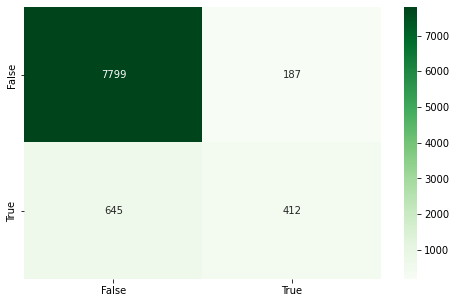

In [59]:
# Plot
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (8,5))

# colormaps : cmap="YlGnBu" , cmap="Greens", cmap="Blues",  cmap="Reds"
sns.heatmap(cm_df, annot=True, cmap="Greens", fmt='d').plot()

In [60]:
# TODO - Model Serving / Use Scikit-learn ML Pipeline / What else?
# ROC-AUC for evaluation

In [61]:
from sklearn.metrics import roc_auc_score ,mean_squared_error,accuracy_score,classification_report,roc_curve,confusion_matrix

In [62]:
auc = roc_auc_score(y_test, y_pred)
print('ROC_AUC_SCORE is', auc)

print('Classification Report:')
print(classification_report(y_test,y_pred))

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
print('false_positive_rate: ', false_positive_rate)
print('true_positive_rate: ', true_positive_rate)
print('thresholds: ', thresholds)


ROC_AUC_SCORE is 0.6831832125330018
Classification Report:
              precision    recall  f1-score   support

       False       0.92      0.98      0.95      7986
        True       0.69      0.39      0.50      1057

    accuracy                           0.91      9043
   macro avg       0.81      0.68      0.72      9043
weighted avg       0.90      0.91      0.90      9043

false_positive_rate:  [0.         0.02341598 1.        ]
true_positive_rate:  [0.        0.3897824 1.       ]
thresholds:  [2 1 0]


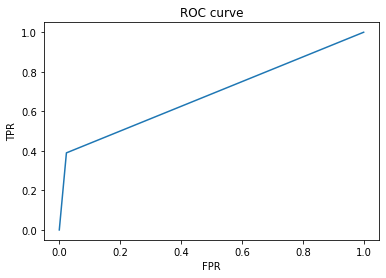

In [63]:
plt.plot(false_positive_rate, true_positive_rate)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()